In [13]:
import pandas as pd

# Load the uploaded dataset
df = pd.read_csv("C:/Users/ADMIN/OneDrive/Desktop/30 days of python/Movie recomendation system.csv")

# Display the first few rows
df.head()


,movieId,title,genres,imdbId,tmdbId,rating,userId,movieId.1,tag,userId.1
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,4.0,1,60756.0,funny,2.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,4.0,1,60756.0,Highly quotable,2.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,4.0,1,60756.0,will ferrell,2.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0,5.0,1,89774.0,Boxing story,2.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0,5.0,1,89774.0,MMA,2.0


Missing values:
movieId         0
title           0
genres          0
imdbId          0
tmdbId          8
rating          0
userId          0
movieId.1    6059
tag          6059
userId.1     6059
dtype: int64

Data types:
movieId        int64
title         object
genres        object
imdbId         int64
tmdbId       float64
rating       float64
userId         int64
movieId.1    float64
tag           object
userId.1     float64
dtype: object


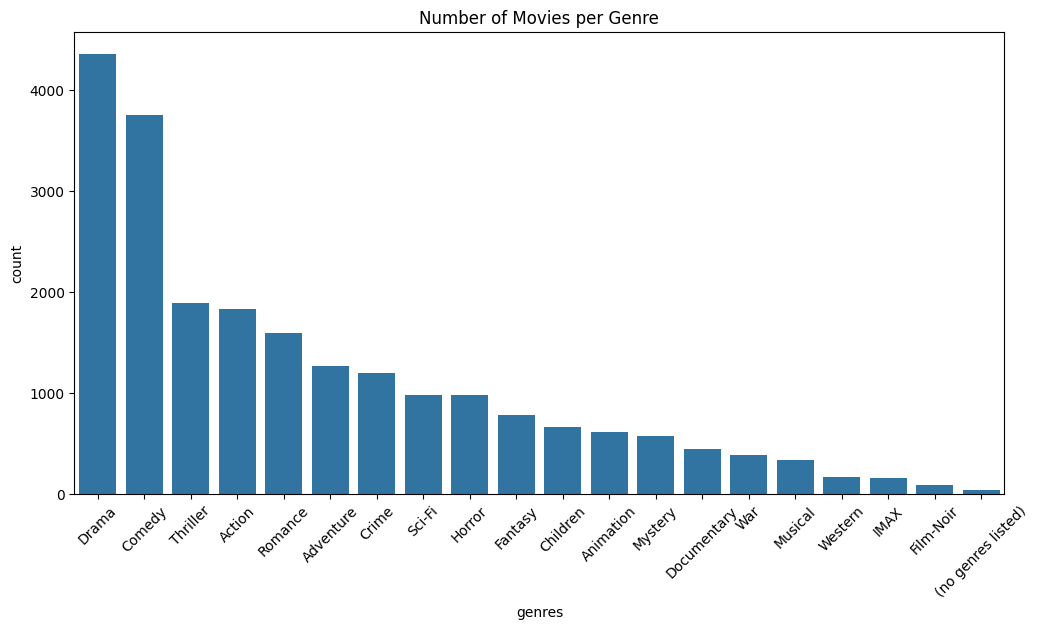

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the dataframe 'df' is defined by executing the earlier cells
# Check for nulls
print("Missing values:")
print(df.isnull().sum())

# Basic stats
print("\nData types:")
print(df.dtypes)

# If 'genres' or 'rating' exists, show frequency
if 'genres' in df.columns:
    df['genres'] = df['genres'].astype(str).str.split('|')
    df_exploded = df.explode('genres')
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_exploded, x='genres', order=df_exploded['genres'].value_counts().index)
    plt.title("Number of Movies per Genre")
    plt.xticks(rotation=45)
    plt.show()


In [15]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

# Encode genres
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(df['genres'])
genres_df = pd.DataFrame(genres_encoded, columns=mlb.classes_)

# Merge encoded genres into the original dataframe
df = pd.concat([df.reset_index(drop=True), genres_df], axis=1)

# Create binary target: liked = rating >= 4
df['liked'] = df['rating'] >= 4

# Define features and target
X = genres_df
y = df['liked']

# Split into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print output info
print(f"Features shape (X): {X.shape}")
print(f"Target shape (y): {y.shape}")
print(f"Training set size : {X_train.shape[0]}")
print(f"Test set size     : {X_test.shape[0]}")


Features shape (X): (9742, 20)
Target shape (y): (9742,)
Training set size : 7793
Test set size     : 1949


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Show some predictions
print(f"First 10 predictions: {y_pred[:10]}")
print(f"Actual labels       : {y_test[:10].tolist()}")


First 10 predictions: [False False False False False  True  True  True False  True]
Actual labels       : [False, False, True, True, False, True, True, False, True, False]


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("🔍 Model Evaluation Results:\n")
print(f"✅ Accuracy : {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall   : {recall:.4f}")
print(f"✅ F1 Score : {f1:.4f}")

print("\n📊 Confusion Matrix:")
print(conf_matrix)

print("\n📋 Classification Report:")
print(report)


🔍 Model Evaluation Results:

✅ Accuracy : 0.4982
✅ Precision: 0.4880
✅ Recall   : 0.4462
✅ F1 Score : 0.4662

📊 Confusion Matrix:
[[544 448]
 [530 427]]

📋 Classification Report:
              precision    recall  f1-score   support

       False       0.51      0.55      0.53       992
        True       0.49      0.45      0.47       957

    accuracy                           0.50      1949
   macro avg       0.50      0.50      0.50      1949
weighted avg       0.50      0.50      0.50      1949



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:")
print(conf_matrix)



📊 Confusion Matrix:
[[544 448]
 [530 427]]


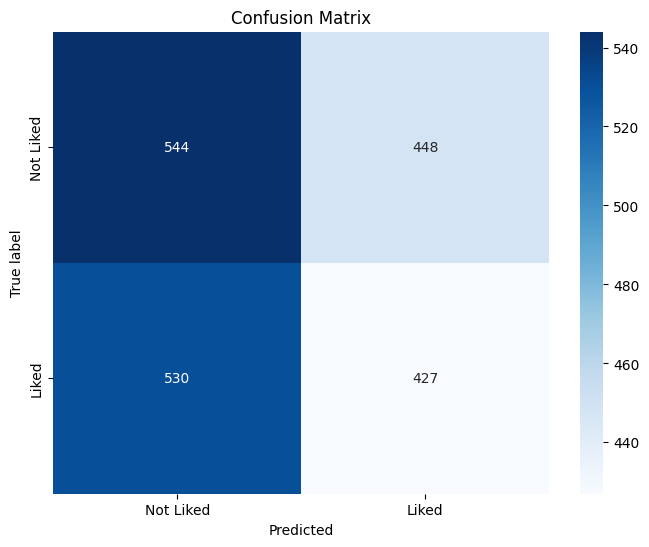

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Liked', 'Liked'], yticklabels=['Not Liked', 'Liked'])
plt.xlabel('Predicted')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()